In [12]:
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### LOADING IMAGES
"path" should give the absolute path to your images. The directory should contain only your images that have been z-projected and cropped to the edges of the embryos. You will have to run this script once for each group, and all images for one group should be placed in the same directory. This will only work for 2-cell embryos. Ensure that all images are placed in the same orientation (i.e. anterior cell on the left)

In [13]:
path = "/Volumes/BIG_DATA/04_DATA/03_NALY_ERM1_LOC/RTR/control/"

image_names = os.listdir(path)
image_names = [name for name in image_names if not name.startswith("._")]

#### CHANNEL

Set 'channel_number' to be the index of your channel of interest. Keep in mind that this value will be offset by 1 (your first channel has index 0 and so on).

In [14]:
channel_number = 1
imgs = [io.imread(os.path.join(path, imname))[:,:,channel_number] for imname in image_names]

In [15]:
flat = []

#Collapse the images to 1 dimension by summing the columns at each row position.
for i, img in enumerate(imgs):
    flat.append(np.sum(img,axis=0))

In [16]:
# 1 Dimensional Interpolation function. Takes array of length N and returns interpolated value array of length M

def _interp1d(array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)

In [17]:
# Loop through all 1 dimensional data and interpolate to 500 points 
# (500 is chosen as most embryos will be approximately 500 pixels wide)
flat_ints = []

for i, f in enumerate(flat):
    flat_ints.append(_interp1d(f, 500))

In [18]:
# Normalize the data to between 0 and 1 based on the maximum value of the dataset. 
flat_ints = flat_ints / np.max(flat_ints)

In [19]:
# This cell creates a dataframe that will play nice with seaborn's lineplot function.

dfs = []

for f in flat_ints:

    df = pd.DataFrame(f)
    df.rename(columns={0: "intensity"}, inplace=True)
    df["pos"] = list(range(1, 501))
    dfs.append(df)

plotting_df = pd.concat(dfs, axis=0)

In [9]:
# Show structure of plotting_df

plotting_df

,intensity,pos
0,0.024338,1
1,0.032976,2
2,0.041600,3
3,0.049371,4
4,0.053522,5
...,...,...
495,0.392187,496
496,0.394248,497
497,0.397286,498
498,0.402046,499


#### Plotting

This seaborn plot shows the average value at each position with the 95% Confidence interval shaded. See the seaborn documentation for customization of the figure. Place a string containing the save path into the variable save if you want to save the figure. 

In [20]:
save = None

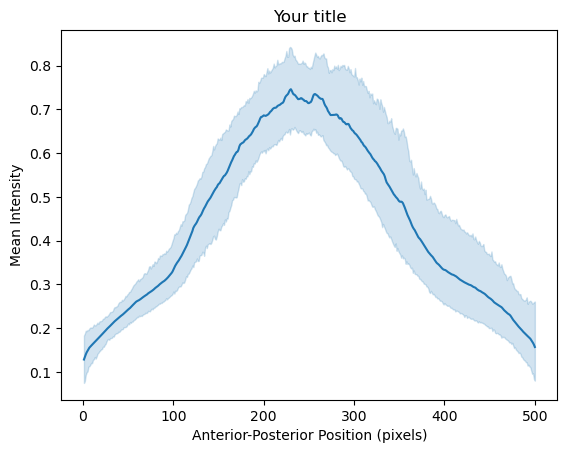

In [21]:
ax = sns.lineplot(data=plotting_df, x="pos", y="intensity")
ax.set(ylabel="Mean Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "Your title");

if save is not None:
    plt.savefig(save)
